In [4]:
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

#由於本身最近很喜歡lesserafim，因此想針對台灣有使用ptt的朋朋，了解大家對她們第二次回歸antifrafile的看法(包含回歸前、回歸後、相關舞台等)
import requests 
import json
import csv
import time
from time import sleep
import pandas as pd
import re
from bs4 import BeautifulSoup

# 設定 User-Agent

headers = {
    'cookie': 'over18=1', 
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'
}

# 發送 GET 請求取得文章內容
url = "https://www.ptt.cc/bbs/KoreaStar/search?q=antifragile"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

if response.status_code == 200:
    print(f'請求成功：{response.status_code}')
else:
    print(f'請求失敗：{response.status_code}')
    
url = "https://www.ptt.cc/bbs/KoreanPop/search?q=antifragile"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

if response.status_code == 200:
    print(f'請求成功：{response.status_code}')
else:
    print(f'請求失敗：{response.status_code}')

請求成功：200
請求成功：200


In [5]:
# 爬取PTT韓星版的文章連結
url1 = "https://www.ptt.cc/bbs/KoreaStar/search?q=antifragile"
headers = {"cookie": "over18=1;"} # 需要帶上cookie才能繞過18禁檢查
r1 = requests.get(url1, headers=headers)
soup1 = BeautifulSoup(r1.text, "html.parser")
articles1 = soup1.find_all("div", class_="r-ent")
kstar_links = []
for article in articles1:
    try:
        link = "https://www.ptt.cc" + article.find("a")["href"]
        kstar_links.append(link)
    except:
        continue

# 爬取PTT韓國綜藝版的文章連結
url2 = "https://www.ptt.cc/bbs/KoreanPop/search?q=antifragile"
r2 = requests.get(url2, headers=headers)
soup2 = BeautifulSoup(r2.text, "html.parser")
articles2 = soup2.find_all("div", class_="r-ent")
kpop_links = []
for article in articles2:
    try:
        link = "https://www.ptt.cc" + article.find("a")["href"]
        kpop_links.append(link)
    except:
        continue

# 將兩個版的文章連結寫入不同的csv檔
with open("LESSERAFIM.csv", mode="w", encoding="utf-8", newline="") as f1:
    writer1 = csv.writer(f1)
    for link in kstar_links:
        writer1.writerow([link])

with open('LESSERAFIM.csv', 'a', newline='', encoding='utf-8') as f2:
    writer2 = csv.writer(f2)
    for link in kpop_links:
        writer2.writerow([link])

In [1]:
df = pd.read_csv('LESSERAFIM.csv', header=None)

# 建立 comments.csv
with open('comments.csv', 'w', encoding='utf-8-sig') as f:
    f.write('id,comment\n')  # 寫入標題列
    k=1
    for i in range(len(df)):
        url = df.iloc[i, 0]  # 選取第 i 列的第 0 欄
        #print(f'正在處理第 {i+1} 篇文章...')
        res = requests.get(url, headers=headers)
        soup = BeautifulSoup(res.text, 'html.parser')

        # 取得留言內容
        comments = soup.select('.push-content')
        for j, comment in enumerate(comments):
            # 將留言內容存入 comments.csv
            f.write(f'{k},{comment.text.strip()}\n')
            k+=1

NameError: name 'pd' is not defined

In [5]:
# 測試結巴功能
documents = ["LS大發，走花路吧"]
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 2.186 seconds.
Prefix dict has been built successfully.


LS/大發/，/走花路/吧


In [6]:
data = pd.read_csv("comments.csv", usecols=[0, 1], names=["id", "comment"], header=0)
data.head(10)

,id,comment
0,1,: 推推
1,2,: Oricon串流破億 海外女性史上最速
2,3,: (24周) 預計3周後被Ditto刷新(18周)
3,4,: 推
4,5,: 推！
5,6,: 這首音源真的很好
6,7,: 推
7,8,: abc真的很關注LS的成績XD
8,9,: 越來越期待回歸了
9,10,: 所以之前會煩躁是因為他穿著采源造型吧


In [20]:
segments = []
for comment in data['comment']:
    seg_list = jieba.lcut(comment)
    segments.append(seg_list)

# 把 list 轉成 DataFrame
df_segments = pd.DataFrame({'seg': segments})

# 顯示斷詞結果
print(df_segments.head(10))

                                                 seg
0                                         [:,  , 推推]
1     [:,  ,  , Oricon, 串流, 破, 億,  , 海外, 女性, 史上, 最速]
2  [:,  ,  , (, 24, 周, ),  , 預計, 3, 周後被, Ditto, 刷...
3                                          [:,  , 推]
4                                       [:,  , 推, ！]
5                           [:,  , 這首, 音源, 真的, 很, 好]
6                                          [:,  , 推]
7              [:,  , abc, 真的, 很, 關注, LS, 的, 成績, XD]
8                           [:,  , 越來, 越, 期待, 回歸, 了]
9     [:,  , 所以, 之前, 會, 煩躁, 是, 因為, 他, 穿著, 采源, 造型, 吧]


In [8]:
#合成list
LIST = df_segments['seg'].to_list()
print(LIST)

[[':', ' ', '推推'], [':', ' ', ' ', 'Oricon', '串流', '破', '億', ' ', '海外', '女性', '史上', '最速'], [':', ' ', ' ', '(', '24', '周', ')', ' ', '預計', '3', '周後被', 'Ditto', '刷新', '(', '18', '周', ')'], [':', ' ', '推'], [':', ' ', '推', '！'], [':', ' ', '這首', '音源', '真的', '很', '好'], [':', ' ', '推'], [':', ' ', 'abc', '真的', '很', '關注', 'LS', '的', '成績', 'XD'], [':', ' ', '越來', '越', '期待', '回歸', '了'], [':', ' ', '所以', '之前', '會', '煩躁', '是', '因為', '他', '穿著', '采源', '造型', '吧'], [':', ' ', '超', '好笑'], [':', ' ', '他', '這次', '回歸收', '穫', '滿滿', '欸', 'XDDD'], [':', ' ', '他', '到底', '為何', '可以', '有', '那麼', '多', '欠', '打', '的', '衣服', '啊'], [':', ' ', '吐舌', '頭好', '到位'], [':', ' ', '他', '好', '適合', '這種', '舞蹈', 'XDDDD'], [':', ' ', '跳得', '很', '好'], [':', ' ', '這次', '話', '題度', '好', '高', 'XD'], [':', ' ', '真的', '很會', 'XD', ' ', '光芒', '直接', '把後面', '五個', '蓋', '掉'], [':', ' ', '天', '啊', '我', '好', '想', '衝破', '螢幕', '去', '前面', '扁', '他', '喔'], [':', ' ', '但', '我', '還是', '忍不住', '想', '看', '很多遍', 'XD'], [':', ' ', '他', '真的', '打算', '搜集', 

In [23]:
#將kist內部的元素拆分
List = []
for key in range(len(LIST)):
    for value in LIST[key]:
        List.append(value)
print(List)

[':', ' ', '推推', ':', ' ', ' ', 'Oricon', '串流', '破', '億', ' ', '海外', '女性', '史上', '最速', ':', ' ', ' ', '(', '24', '周', ')', ' ', '預計', '3', '周後被', 'Ditto', '刷新', '(', '18', '周', ')', ':', ' ', '推', ':', ' ', '推', '！', ':', ' ', '這首', '音源', '真的', '很', '好', ':', ' ', '推', ':', ' ', 'abc', '真的', '很', '關注', 'LS', '的', '成績', 'XD', ':', ' ', '越來', '越', '期待', '回歸', '了', ':', ' ', '所以', '之前', '會', '煩躁', '是', '因為', '他', '穿著', '采源', '造型', '吧', ':', ' ', '超', '好笑', ':', ' ', '他', '這次', '回歸收', '穫', '滿滿', '欸', 'XDDD', ':', ' ', '他', '到底', '為何', '可以', '有', '那麼', '多', '欠', '打', '的', '衣服', '啊', ':', ' ', '吐舌', '頭好', '到位', ':', ' ', '他', '好', '適合', '這種', '舞蹈', 'XDDDD', ':', ' ', '跳得', '很', '好', ':', ' ', '這次', '話', '題度', '好', '高', 'XD', ':', ' ', '真的', '很會', 'XD', ' ', '光芒', '直接', '把後面', '五個', '蓋', '掉', ':', ' ', '天', '啊', '我', '好', '想', '衝破', '螢幕', '去', '前面', '扁', '他', '喔', ':', ' ', '但', '我', '還是', '忍不住', '想', '看', '很多遍', 'XD', ':', ' ', '他', '真的', '打算', '搜集', '滿', 'IZONE', '碎片', '然後彈', '指', '對', '吧',

In [54]:
results = pd.value_counts(List)
results

       2531
:      1705
的       457
好       295
，       271
       ... 
如何        1
結束        1
鐘感覺       1
炒作        1
制         1
Length: 2918, dtype: int64

In [11]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [63]:
# 設定停用詞
stop_words = open('stop_words.txt', 'r', encoding='utf-8').read()

# 斷詞
seg_list = jieba.lcut(' '.join(results.index), cut_all=False)

# 篩選停用詞
seg_list = [word for word in List if word not in stop_words]
seg_list

['推推',
 'Oricon',
 '串流',
 '破',
 '億',
 '海外',
 '女性',
 '史上',
 '最速',
 '(',
 '24',
 '周',
 ')',
 '預計',
 '3',
 '周後被',
 'Ditto',
 '刷新',
 '(',
 '18',
 '周',
 ')',
 '推',
 '推',
 '！',
 '這首',
 '音源',
 '好',
 '推',
 'abc',
 '關注',
 'LS',
 '成績',
 '越來',
 '越',
 '期待',
 '回歸',
 '所以',
 '之前',
 '會',
 '煩躁',
 '因為',
 '他',
 '穿著',
 '采源',
 '造型',
 '吧',
 '超',
 '好笑',
 '他',
 '這次',
 '回歸收',
 '穫',
 '滿滿',
 '欸',
 '他',
 '到底',
 '為何',
 '可以',
 '那麼',
 '多',
 '欠',
 '打',
 '衣服',
 '啊',
 '吐舌',
 '頭好',
 '到位',
 '他',
 '好',
 '適合',
 '這種',
 '舞蹈',
 'XDDDD',
 '跳得',
 '好',
 '這次',
 '話',
 '題度',
 '好',
 '高',
 '很會',
 '光芒',
 '直接',
 '把後面',
 '五個',
 '蓋',
 '掉',
 '天',
 '啊',
 '我',
 '好',
 '想',
 '衝破',
 '螢幕',
 '去',
 '前面',
 '扁',
 '他',
 '喔',
 '我',
 '還是',
 '忍不住',
 '想',
 '看',
 '很多遍',
 '他',
 '打算',
 '搜集',
 '滿',
 'IZONE',
 '碎片',
 '然後彈',
 '指',
 '對',
 '吧',
 '超會',
 '跳',
 '讓',
 '人',
 '默默地',
 '又',
 '開始',
 '火大',
 '現在',
 '已',
 '經有',
 '櫻花',
 '采源',
 '珉周',
 '柔理',
 '跟員瑛',
 '耶',
 '非常',
 '生氣',
 '又',
 '好好看',
 '保養',
 '好',
 '完全',
 '不輸',
 '年',
 '輕人',
 'Copy',
 '采源',
 '造型',
 '。',
 '笑',
 '

In [64]:
results2 = pd.value_counts(seg_list)
results2

好     295
！     244
聽     214
喜歡    127
舞台    121
     ... 
預感      1
惹       1
如何      1
結束      1
制       1
Length: 2896, dtype: int64

In [65]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

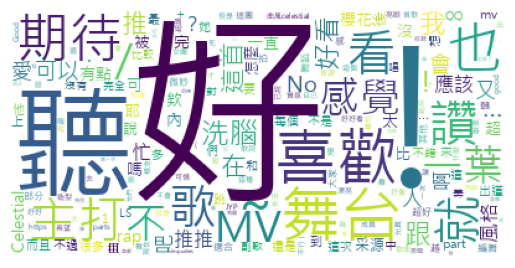

<Figure size 2500x1500 with 0 Axes>

In [68]:
wc = WordCloud(font_path= "C:\Windows\Fonts\msjh.ttc", 
               background_color="white", 
               max_words=200)

wc.generate_from_frequencies(results2)
 
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(50,30), dpi =50)
plt.show()